# Develop LSTM Models For Univariate Time Series Forecasting

## Problem statement 

**Suppose the numbers here represent the sales of the company every month**
   `M1`,`M2`,`M3`,`M4`,`M5`,`M6`,`M7` ,`M8`,`M9`
   
[110, 125 ,133, 146, 158, 172, 187, 196, 210]

* Task is to predict the nest sales like for month 10 and so on, considering the sales of the past 3 months

**for example**

To find the sale on M10, we consider sales of month (M7,M8,M9), likewise for M11,M12 and so on


In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def  prepare_data(timeseries_data, n_steps):
    X,y=[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_lop=i + n_steps
        # We did -1 beacuse at 6 we get end_lop=9 i.x X=[187, 196, 210] we dont get Y here
        # That why at i=5 X=[172 187 196] we get y=210 so we want the loop to end at len(data)-1
        if end_lop > len(timeseries_data)-1:
            break
        newX=timeseries_data[i:end_lop]
        newY=timeseries_data[end_lop]
        X.append(newX)
        y.append(newY)
    return np.array(X), np.array(y)
        

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps) 
print(X)
print("-"*100)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
----------------------------------------------------------------------------------------------------
[146 158 172 187 196 210]


### Shape of the data

In [4]:
print(X.shape)
print("-"*100)
print(y.shape)

(6, 3)
----------------------------------------------------------------------------------------------------
(6,)


In [5]:
### In LSTM we need shape of input into 3 dimension 
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X=X.reshape(X.shape[0],X.shape[1],n_features)
X.shape

(6, 3, 1)

# Building LSTM Model

In [6]:
# define model
model = Sequential()
# here n_steps=3(Based no num of time steps) ,n_features=1
model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [7]:
### Model summmary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X, y, epochs=150, verbose=1)

Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 32732.2871
Epoch 2/150
1/1 [==============================] - 0s 15ms/step - loss: 31353.5879
Epoch 3/150
1/1 [==============================] - 0s 20ms/step - loss: 30493.8027
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 29798.0176
Epoch 5/150
1/1 [==============================] - 0s 10ms/step - loss: 29142.8809
Epoch 6/150
1/1 [==============================] - 0s 23ms/step - loss: 28527.2656
Epoch 7/150
1/1 [==============================] - 0s 10ms/step - loss: 27888.4551
Epoch 8/150
1/1 [==============================] - 0s 15ms/step - loss: 27197.9160
Epoch 9/150
1/1 [==============================] - 0s 15ms/step - loss: 26452.0449
Epoch 10/150
1/1 [==============================] - 0s 12ms/step - loss: 25768.7637
Epoch 11/150
1/1 [==============================] - 0s 15ms/step - loss: 25006.9629
Epoch 12/150
1/1 [==============================] - 0s 15ms/step - loss: 24139.4121
Epo

# Predicting For the next 10 data

**Testing with the data suppose [110,155,200]**

In [9]:
x_input=np.array([85,205,295])
input_lst=list(x_input)
input_lst
n_features=1

In [10]:
print(x_input.shape)
print("-"*100)
print(n_steps)

(3,)
----------------------------------------------------------------------------------------------------
3


In [11]:
# x_input=np.array([87,196,210])
# input_lst=list(x_input)
# input_lst
# n_features=1


In [12]:
i=0
out_lst=[]
while i<10:
    if len(input_lst) >3:
        x_input=np.array(input_lst[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input=x_input.reshape(1,n_steps,n_features)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        input_lst.append(yhat[0][0])
        input_lst=input_lst[1:] # reset shape of input again to 3
        out_lst.append(yhat[0][0])
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,n_features)
        print("{} day input {}".format(i,x_input))
        yhat=model.predict(x_input,verbose=0)
        input_lst.append(yhat[0][0])
        out_lst.append(yhat[0][0])
        print("{} day Output {}".format(i,out_lst))
        i=i+1

0 day input [[[ 85]
  [205]
  [295]]]
0 day Output [178.02893]
1 day input [205.         295.         178.02893066]
1 day output [[274.00946]]
2 day input [295.         178.02893066 274.00946045]
2 day output [[303.68927]]
3 day input [178.02893 274.00946 303.68927]
3 day output [[265.20743]]
4 day input [274.00946 303.68927 265.20743]
4 day output [[332.35342]]
5 day input [303.68927 265.20743 332.35342]
5 day output [[348.79776]]
6 day input [265.20743 332.35342 348.79776]
6 day output [[349.99326]]
7 day input [332.35342 348.79776 349.99326]
7 day output [[399.55832]]
8 day input [348.79776 349.99326 399.55832]
8 day output [[418.93817]]
9 day input [349.99326 399.55832 418.93817]
9 day output [[440.08563]]


**y_hat[0][0] output is**
* 161.63893

1. that is why we do y_hat[0][0] in order to get 161.63 esel we get array([161.63])

#### The input Data


In [13]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

### the output data

In [14]:
out_lst

[178.02893,
 274.00946,
 303.68927,
 265.20743,
 332.35342,
 348.79776,
 349.99326,
 399.55832,
 418.93817,
 440.08563]

# Visualizaing The Output

In [15]:
import matplotlib.pyplot as plt

In [16]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

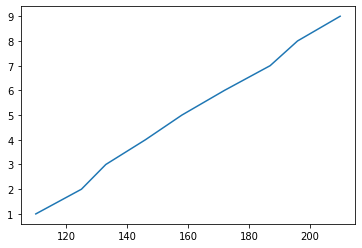

In [17]:
plt.plot(timeseries_data,day_new)

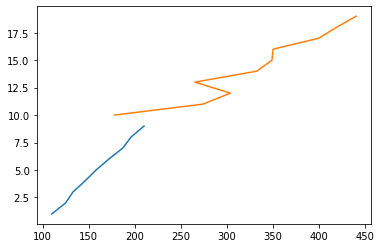

In [18]:
plt.plot(timeseries_data,day_new)
plt.plot(out_lst,day_pred)